In [40]:
#imports
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import random


reading the dataset

In [41]:
def read_csv(file_path,has_header):
    """this function is used for taking the dataset from .csv file making a test train split
    and x, y split (has header is either True or False)"""

    #reading the .csv
    if has_header:
        df = pd.read_csv(file_path, header=0, delimiter=",")  # First row as header
        print(f"Dataset shape: {df.shape}")
        print(f"Column names: {list(df.columns)}")
    else:
        df = pd.read_csv(file_path, header=None, delimiter=",")  # No header row
        print(f"Dataset shape: {df.shape}")
    
    return df


selecting the dataset

In [42]:
df = read_csv("beans_kmeans.csv", True)
label_column = 16

Dataset shape: (13611, 17)
Column names: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']


making string columns numeric

In [43]:
# Find all string/object columns automatically
string_columns = df.select_dtypes(include=['object']).columns

# Encode all string columns
for column in string_columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

mi for all features (graph)

In [44]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


            Feature  MI_Score
1         Perimeter  1.004428
7     EquivDiameter  0.969148
2   MajorAxisLength  0.953335
6        ConvexArea  0.949652
0              Area  0.930395
13     ShapeFactor2  0.929777
12     ShapeFactor1  0.897478
3   MinorAxisLength  0.868393
11      Compactness  0.806820
4      AspectRation  0.803643
14     ShapeFactor3  0.801942
5      Eccentricity  0.787798
10        roundness  0.765892
15     ShapeFactor4  0.330780
9          Solidity  0.216051
8            Extent  0.193779


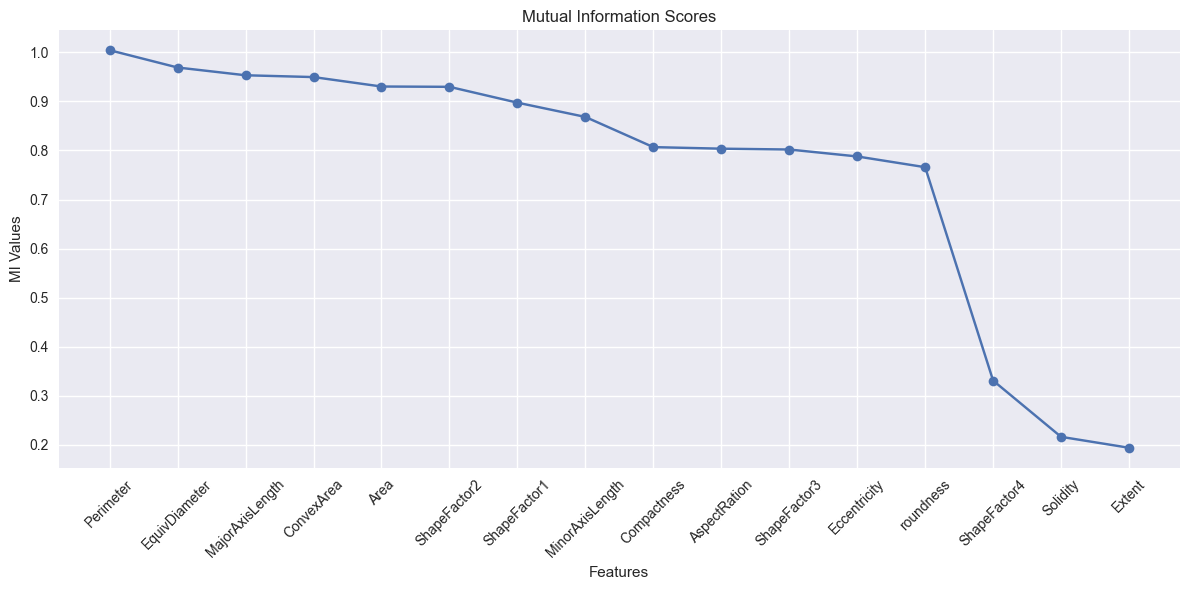

In [45]:
def mi_for_all(df_name = df, lc = label_column):
    y = df_name.iloc[:, lc]
    x = df_name.drop(df.columns[lc], axis=1)
    
    mi_scores = mutual_info_classif(x, y, discrete_features=False)
    mi_df = pd.DataFrame({"Feature": x.columns, "MI_Score": mi_scores}).sort_values(by="MI_Score", ascending=False)
    print(mi_df)


    # Create line plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(mi_df["Feature"], mi_df["MI_Score"], marker='o')
    ax.set_xlabel("Features")
    ax.set_ylabel("MI Values")
    ax.set_title("Mutual Information Scores")
    plt.style.use('seaborn-v0_8')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return x,y

x,y = mi_for_all()



vertical split

In [46]:
# Target columns count (divide into 3 parts, take integer)
total_columns = df.shape[1]
target_columns_count = total_columns // 3

# Pick random feature columns from total number of columns from dataset x
random.seed(42)
random_cols = random.sample(range(x.shape[1]), target_columns_count - 1)

# Build target_set (label first, then random features)
target_set = pd.concat([y, x.iloc[:, random_cols]], axis=1)
# Fix target_set: make sure y is first column
target_set = target_set[[y.name] + [col for col in target_set.columns if col != y.name]]  # reorder

remaining_set = x.drop(x.columns[random_cols], axis=1)


print("Target columns count:", target_columns_count)
print("Selected feature indices:", random_cols)


print(target_set.head(), "\n")
print(remaining_set.head())


Target columns count: 5
Selected feature indices: [3, 0, 11, 4]
   Class  MinorAxisLength  Area  Compactness  AspectRation
0      5              1.0     0         12.0           0.0
1      5              2.0     0         13.0           0.0
2      5              1.0     0         11.0           1.0
3      5              2.0     0         12.0           0.0
4      5              2.0     0         13.0           0.0 

   Perimeter  MajorAxisLength  Eccentricity  ConvexArea  EquivDiameter  \
0        0.0              0.0           4.0           0            0.0   
1        0.0              0.0           1.0           0            0.0   
2        0.0              0.0           4.0           0            0.0   
3        0.0              0.0           3.0           0            0.0   
4        0.0              0.0           1.0           0            0.0   

   Extent  Solidity  roundness  ShapeFactor1  ShapeFactor2  ShapeFactor3  \
0     9.0      11.0       13.0           9.0          13.0 

mi on the set with label to find the target (lowest mi)

           Feature  MI_Score
0            Class  1.835143
1  MinorAxisLength  0.879402
2      Compactness  0.812472
3     AspectRation  0.791787


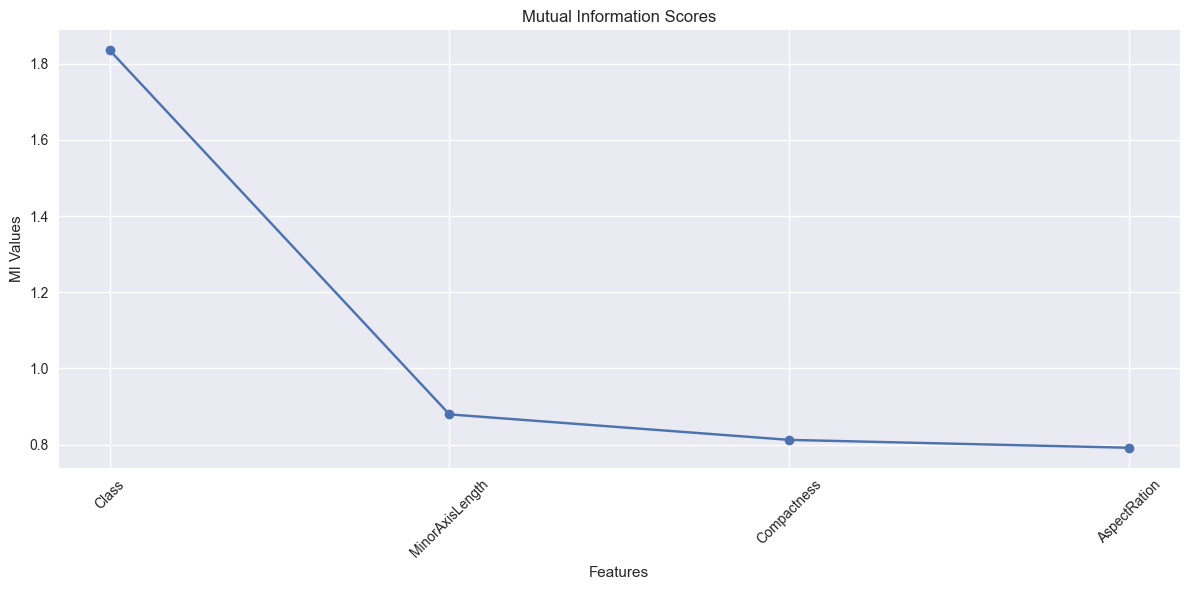

(       Class  MinorAxisLength  Compactness  AspectRation
 0          5              1.0         12.0           0.0
 1          5              2.0         13.0           0.0
 2          5              1.0         11.0           1.0
 3          5              2.0         12.0           0.0
 4          5              2.0         13.0           0.0
 ...      ...              ...          ...           ...
 13606      3              2.0          6.0           5.0
 13607      3              2.0          7.0           4.0
 13608      3              2.0          7.0           4.0
 13609      3              2.0          7.0           4.0
 13610      3              2.0          5.0           6.0
 
 [13611 rows x 4 columns],
 0        5
 1        5
 2        5
 3        5
 4        5
         ..
 13606    3
 13607    3
 13608    3
 13609    3
 13610    3
 Name: Class, Length: 13611, dtype: int64)

In [47]:
mi_for_all(df_name= target_set, lc = 0)

spearman with target to varibales that are outside the set (graph to see elbow)